# Decision Trees: Penguins

In this notebook, I illustrate how decision trees function and how to use Scikit-learn's built-in DT functionality on the Penguins dataset.

In [1]:
# TODO: Add the tree visualizer
# TODO: Plot decision boundaries?
# TODO: K-fold cross-validation (or other validation)
# TODO: Other metrics?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Preprocessing

The penguins dataset features categorical data that we still want to consider in training, but in order to use it we must numerically encode it.

Scikit-learn's `LabelEncoder()` class can be used to do so.

In [15]:
penguins = sns.load_dataset('penguins').dropna()
le = LabelEncoder()
penguins['sex'] = le.fit_transform(penguins['sex'])
penguins['species'] = le.fit_transform(penguins['species'])
penguins['island'] = le.fit_transform(penguins['island'])

In [14]:
penguins['species'].unique()  # Verify the numerical encoding

array([0, 1, 2])

In [16]:
X = penguins.drop('species', axis=1)  # We do not want the species (label) column in our training data
y = penguins['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Here we split the data into train and test sets

In [18]:
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)  # Initialize the classifier
decision_tree.fit(X_train, y_train)  # Train

DecisionTreeClassifier(max_depth=15, random_state=42)

In [19]:
decision_tree.classes_  # Observe the classes

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
tree_rules = export_text(decision_tree)
print(tree_rules, "\n")

In [ ]:
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   class_names = ["Adelie", "Chinstrap", "Gentoo"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

In [25]:
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.94      0.85      0.89        20
      Gentoo       0.95      1.00      0.97        38

    accuracy                           0.96       110
   macro avg       0.96      0.94      0.95       110
weighted avg       0.96      0.96      0.96       110



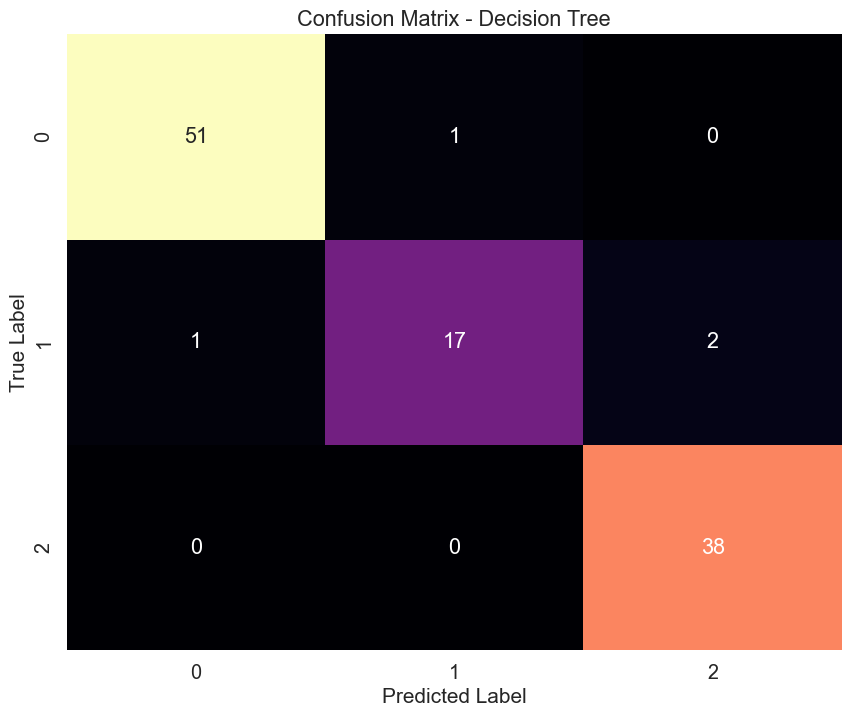

In [27]:
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()